# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat2"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.3881239295005798
Epoch 1, Loss 1.398322343826294
Epoch 2, Loss 1.4006714224815369
Epoch 3, Loss 1.3935973644256592
Epoch 4, Loss 1.3932167887687683
Epoch 5, Loss 1.3947551846504211
Epoch 6, Loss 1.381682574748993
Epoch 7, Loss 1.3922383189201355
Epoch 8, Loss 1.3868547081947327
Epoch 9, Loss 1.3700620532035828
Epoch 10, Loss 1.358144998550415
Epoch 11, Loss 1.367935597896576
Epoch 12, Loss 1.3523665070533752
Epoch 13, Loss 1.3417272567749023
Epoch 14, Loss 1.3394585251808167
Epoch 15, Loss 1.3570571541786194
Epoch 16, Loss 1.3463119268417358
Epoch 17, Loss 1.3413875699043274
Epoch 18, Loss 1.335139274597168
Epoch 19, Loss 1.3664692640304565
Epoch 20, Loss 1.3401517271995544
Epoch 21, Loss 1.3414453864097595
Epoch 22, Loss 1.327839970588684
Epoch 23, Loss 1.3364684581756592
Epoch 24, Loss 1.3068422079086304
Epoch 25, Loss 1.3105596899986267
Epoch 26, Loss 1.3228803873062134
Epoch 27, Loss 1.3029861450195312
Epoch 28, Loss 1.2994222044944763
Epoch 29, Loss 1.2824817299842

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

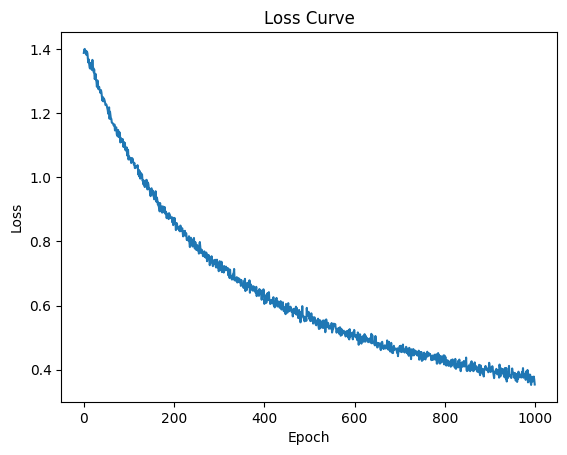

In [5]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


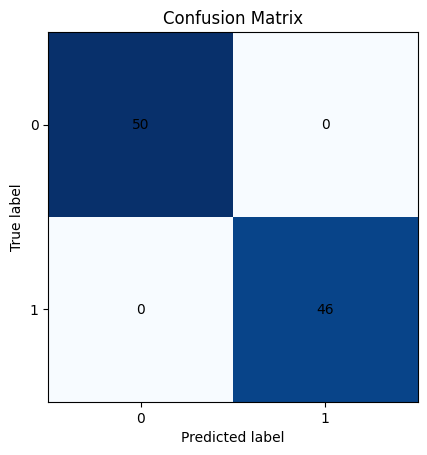

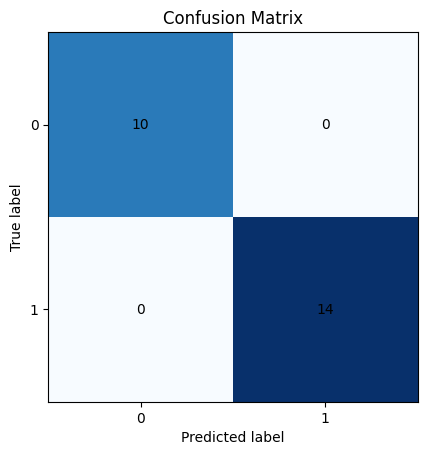

In [6]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

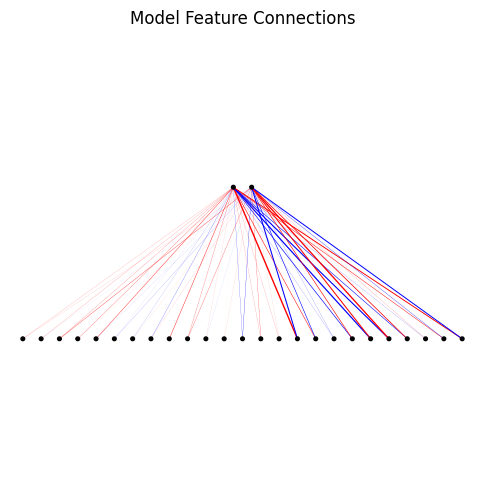

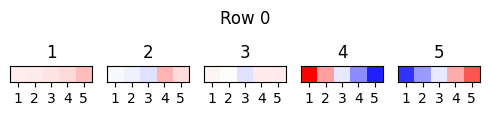

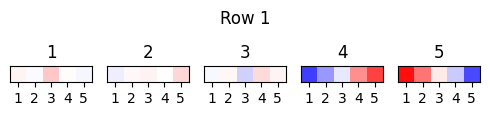

In [7]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)